In [20]:
library("showtext")
showtext_auto(enable = TRUE)
font_add('Songti', 'Songti.ttc')
library("latex2exp")
library("ggplot2")
library('interactions')
library('stargazer')


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [19]:
install.packages("stargazer")


The downloaded binary packages are in
	/var/folders/8b/hhnbt0nd4zsg2qhxc28q23w80000gn/T//RtmpC7gy6f/downloaded_packages


In [5]:
data<-read.csv('zhihu_cateroy_spanning_interaction_2.csv')


In [6]:
head(data)


X,title_length,log_lasting_days,max_level,content_distance,content_distance2,content_distance_by_max_level,content_distance2_by_max_level,Mon,Tue,⋯,H_12_15,H_15_18,H_18_21,log_follower_num,topic_num,knowledge_granularity,log_content_distance,log_content_distance2,log_content_distance_by_max_level,log_content_distance2_by_max_level
<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,13,7.889084,5,0.3053453,0.09323573,1.5267263,0.4661786,0,0,⋯,0,0,0,8.494334,3,5,-0.5137888,0.26397897,1.3198949,1.3198949
1,21,7.878913,7,0.5132803,0.26345670,3.5929623,1.8441969,0,0,⋯,1,0,0,8.128880,2,7,-0.2888001,0.08340549,0.5838384,0.5838384
2,21,7.866339,6,0.5172706,0.26756884,3.1036234,1.6054130,0,0,⋯,0,0,0,4.927254,2,6,-0.2854435,0.08147797,0.4888678,0.4888678
3,15,7.862882,5,0.1460233,0.02132279,0.7301163,0.1066140,0,0,⋯,0,1,0,5.209486,5,5,-0.8326139,0.69324596,3.4662298,3.4662298
4,18,7.858641,8,0.0000000,0.00000000,0.0000000,0.0000000,1,0,⋯,0,0,1,5.627621,1,8,-3.0000000,9.00000000,72.0000000,72.0000000
5,13,7.852828,7,0.1550947,0.02405435,1.0856626,0.1683805,0,1,⋯,0,0,0,9.427466,5,7,-0.8066120,0.65062285,4.5543599,4.5543599


In [23]:
model_1 = lm(log_follower_num ~poly(log_content_distance, 2) ,
          data = data)

In [41]:
model_2 = lm(log_follower_num ~
           poly(log_content_distance, 2)+ knowledge_granularity 
             + title_length+log_lasting_days+Mon+Tue+Wed+Thu+Fri,
          data = data)

In [43]:
model_3 = lm(log_follower_num ~
           poly(log_content_distance, 2)*knowledge_granularity
           + title_length+log_lasting_days+Mon+Tue+Wed+Thu+Fri,
          data = data)

In [7]:
model = lm(log_follower_num ~
           poly(log_content_distance, 2)*knowledge_granularity
           title_length+log_lasting_days+
        +Mon+Tue+Wed+Thu+Fri+H_0_3+H_3_6+H_6_9+H_9_12+H_12_15+H_15_18+H_18_21,
          data = data)

In [36]:
help(stargazer)

In [44]:
stargazer(model_1, model_2, model_3, 
          type = 'html',
          out = 'regression_table2021_html.doc'
)


<table style="text-align:center"><tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">log_follower_num</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">poly(log_content_distance, 2)1</td><td>417.131<sup>***</sup></td><td>280.625<sup>***</sup></td><td>334.198<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(2.123)</td><td>(1.831)</td><td>(5.091)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">poly(log_content_distance, 2)2</td><td>-68.074<sup>***</sup></td><td>-76.937<sup>***</sup></td><td>-42.513<sup>***</sup></td></tr>
<tr><td sty

In [53]:
summary(model_1)



Call:
lm(formula = log_follower_num ~ poly(log_content_distance, 2), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6111 -1.6659 -0.3541  1.4727  9.3109 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      4.018363   0.003338 1203.81   <2e-16 ***
poly(log_content_distance, 2)1 417.131008   2.123201  196.46   <2e-16 ***
poly(log_content_distance, 2)2 -68.074045   2.123201  -32.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.123 on 404574 degrees of freedom
Multiple R-squared:  0.08921,	Adjusted R-squared:  0.0892 
F-statistic: 1.981e+04 on 2 and 404574 DF,  p-value: < 2.2e-16


In [52]:
summary(model_2)



Call:
lm(formula = log_follower_num ~ poly(log_content_distance, 2) + 
    knowledge_granularity + title_length + log_lasting_days + 
    Mon + Tue + Wed + Thu + Fri, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8617 -1.1492 -0.1254  1.0077  8.5124 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     3.592e-01  1.486e-02  24.172  < 2e-16 ***
poly(log_content_distance, 2)1  2.806e+02  1.831e+00 153.239  < 2e-16 ***
poly(log_content_distance, 2)2 -7.694e+01  1.771e+00 -43.454  < 2e-16 ***
knowledge_granularity          -9.572e-03  1.599e-03  -5.985 2.16e-09 ***
title_length                   -1.075e-02  2.690e-04 -39.960  < 2e-16 ***
log_lasting_days                7.239e-01  1.642e-03 440.866  < 2e-16 ***
Mon                             7.327e-03  8.897e-03   0.823   0.4102    
Tue                             8.452e-03  8.800e-03   0.961   0.3368    
Wed                             1.928e-02  8

In [54]:
summary(model_3)



Call:
lm(formula = log_follower_num ~ poly(log_content_distance, 2) * 
    knowledge_granularity + title_length + log_lasting_days + 
    Mon + Tue + Wed + Thu + Fri, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8478 -1.1494 -0.1253  1.0084  8.5337 

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                           3.978e-01  1.541e-02
poly(log_content_distance, 2)1                        3.342e+02  5.091e+00
poly(log_content_distance, 2)2                       -4.251e+01  6.281e+00
knowledge_granularity                                -1.575e-02  1.711e-03
title_length                                         -1.073e-02  2.690e-04
log_lasting_days                                      7.236e-01  1.642e-03
Mon                                                   7.463e-03  8.896e-03
Tue                                                   8.751e-03  8.798e-03
Wed                                

In [48]:
p<-interact_plot(model, pred =log_content_distance, modx = knowledge_granularity, 
                 data = data, interval = TRUE,int.width = 0.8,
                 x.label = TeX("Knowledge Spanning (log)"), y.label = "Appeal of Questions",
                 main.title = "",  legend.main = TeX("Granularity"),)
pdf(file="interaction_sd.pdf", width = 5, height = 5)
#p+xlim(0,1)+ylim(-1000,4000)
p
dev.off()

pdf 
  2

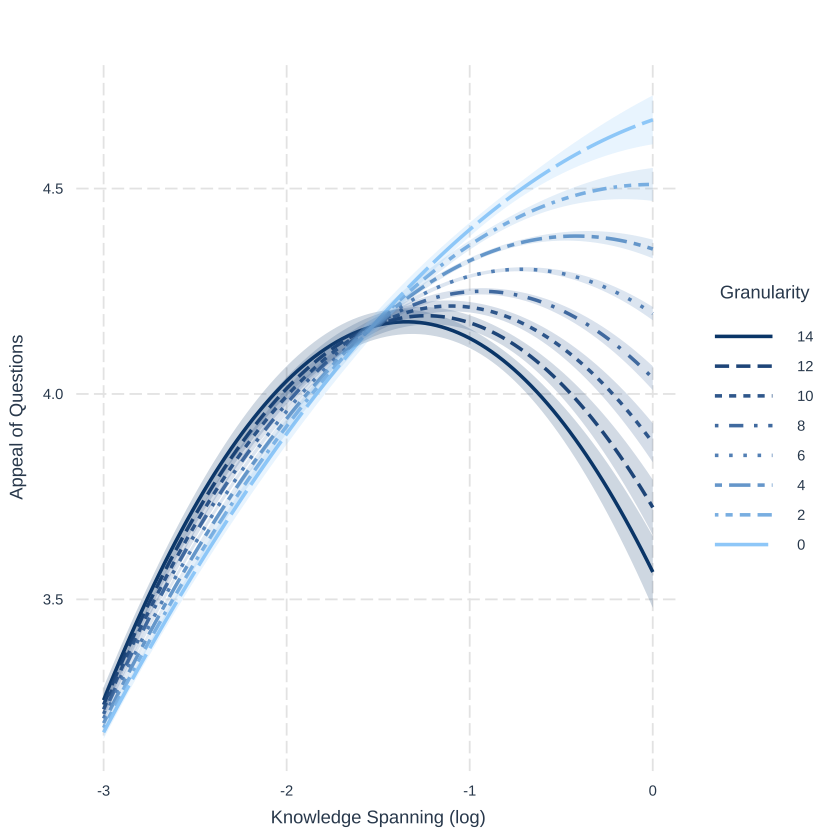

In [49]:
p<-interact_plot(model, pred =log_content_distance, modx = knowledge_granularity, 
                  modx.values = c(0, 2, 4, 6, 8, 10, 12, 14),
                 data = data, interval = TRUE,int.width = 0.8,
                x.label = TeX("Knowledge Spanning (log)"), y.label = TeX("Appeal of Questions"),
                 main.title = "",  legend.main = TeX("Granularity"),)
#p+xlim(0,1)+ylim(-1000,4000)

p


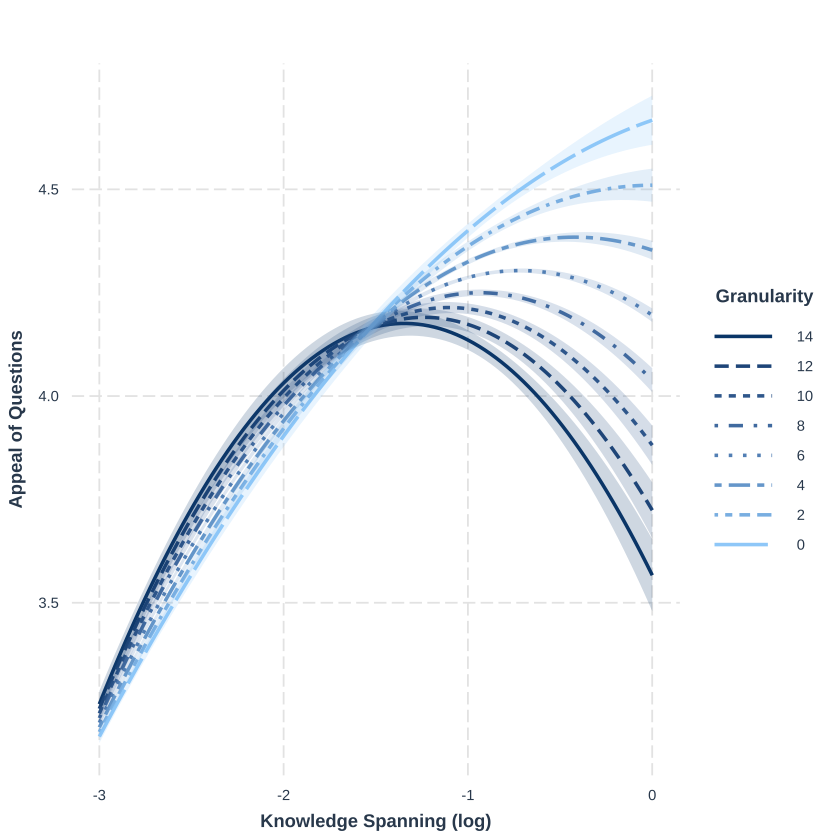

In [50]:
p<-interact_plot(model, pred =log_content_distance, modx = knowledge_granularity, 
                  modx.values = c(0, 2, 4, 6, 8, 10, 12, 14),
                 data = data, interval = TRUE,int.width = 0.8,
                x.label = "Knowledge Spanning (log)", y.label = "Appeal of Questions",
                 main.title = "",  legend.main = "Granularity",)
#p+xlim(0,1)+ylim(-1000,4000)

p


In [51]:
pdf(file="interaction_all2.pdf", width = 5, height = 5)
#p+xlim(0,1)+ylim(-1000,4000)
p
dev.off()

pdf 
  2

In [30]:
help(predictorEffect)

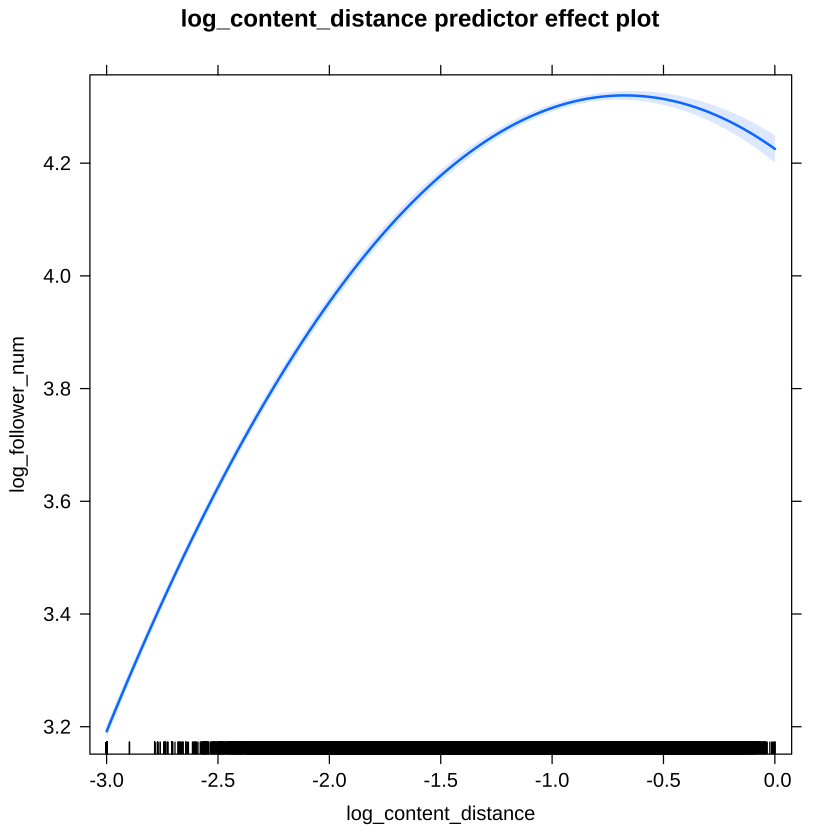

In [31]:
library('effects')
e1.lm1 <- predictorEffect("log_content_distance", model_2, xlevels=5)
plot(e1.lm1)
